In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df["LotArea"]

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

In [8]:
df = df.sort_values(by='LotArea')
df["LotArea"]

956       1300
1039      1477
614       1491
489       1526
1449      1533
         ...  
451      70761
706     115149
249     159000
335     164660
313     215245
Name: LotArea, Length: 1460, dtype: int64

In [11]:
Q1 = df['LotArea'].quantile(0.25)
Q3 = df['LotArea'].quantile(0.75)
IQR = (Q3 - Q1)
T_lower = Q1 -(1.5 * IQR)
T_upper= Q3 + (1.5 * IQR)

In [12]:
df_filtered = df[(df['LotArea'] >= T_lower) & (df['LotArea'] <= T_upper)]
print(f"Outliers Removed: {len(df) - len(df_filtered)}")

Outliers Removed: 69


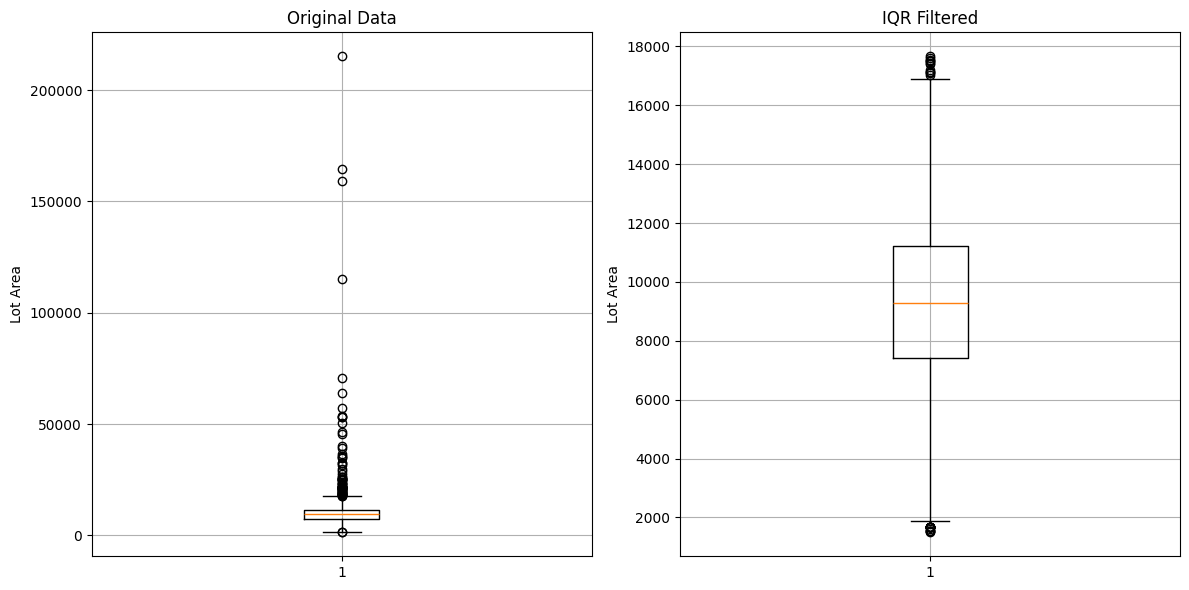

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original Data
axes[0].boxplot(df['LotArea'])
axes[0].set_title('Original Data')
axes[0].set_ylabel('Lot Area')
axes[0].grid(True)

# Filtered
axes[1].boxplot(df_filtered['LotArea'])
axes[1].set_title('IQR Filtered')
axes[1].set_ylabel('Lot Area')
axes[1].grid(True)

plt.tight_layout()
plt.show()

We can see the outliers displayed as individual data points. On the right, we see much less outliers and the box now is not squashed as before.

 